## Question 1 

To verify if the formulations are significantly different statistically.

#### a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric).  Correlation and ANOVA, if applicable, is a must.

#### b. A graphical analysis of the additives, including a distribution study.

#### c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

In [1]:
import os
import pandas as pd
import numpy as np
from ipynb.fs.full.Functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#importing the data
ingredient = pd.read_csv('../data/ingredient.csv')
ingredient.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


## Exploratory data analysis

### After importing the dataset using pandas libarary, statstical EDA is conducted.

In [3]:
#looking into ingredient data and finding the datatypes & number of non-null rows
ingredient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [4]:
#Finding total number of missing values in each features
ingredient.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

In [5]:
ingredient.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


##### Using "Describe" function we can find out about some general information on our dataset. From the table above additive "i" has the least usage (consumption) while "e" has the highest. In addtion, we can obtain information such as mean,std,min which can be useful for further analysis  

In [6]:
ingredient.corr()

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


#### Table above shows the correlations among features. 
#### Heatmap was consutructed for better understanding.

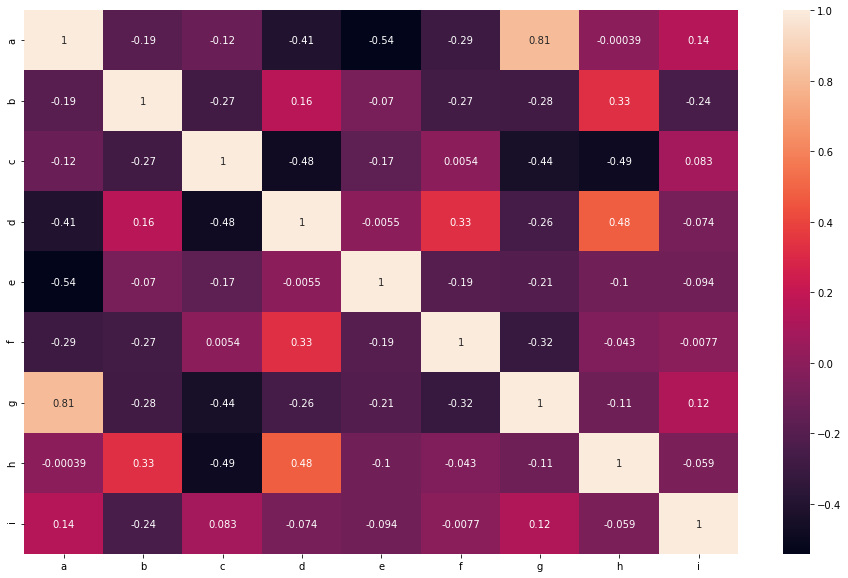

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(ingredient.corr(),annot=True)

Heatmap above shows that "a" has high negative correlations with "e" and "d".
Similarly "c" has high negative relations with "h","g" and "d" meaning if one increases the other will most likely decrease.On the other hand "a" and "g" have the high positve correlations meaning if "a" increases "g" also most likely will increase,same goes to "d" and "h"

In [8]:
df = ingredient.copy()

Box-plot below shows the outliers in each additives. There are several outliers can be detected in this figure however "e" has diffrent scale than the rest. Therefore they are plotted separately for better visualization. Based on Boxplots, the means for each additives are different. T-test (for two features) or ANOVA analysis (more than 2 features) to further determine if there is any significant difference between the additives.

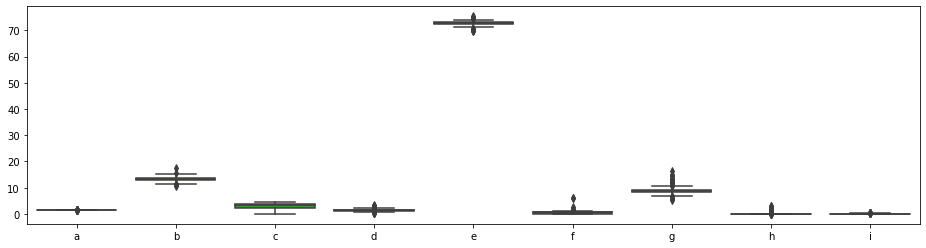

In [9]:
plt.figure(figsize=(16, 4))
sns.boxplot(data = ingredient)

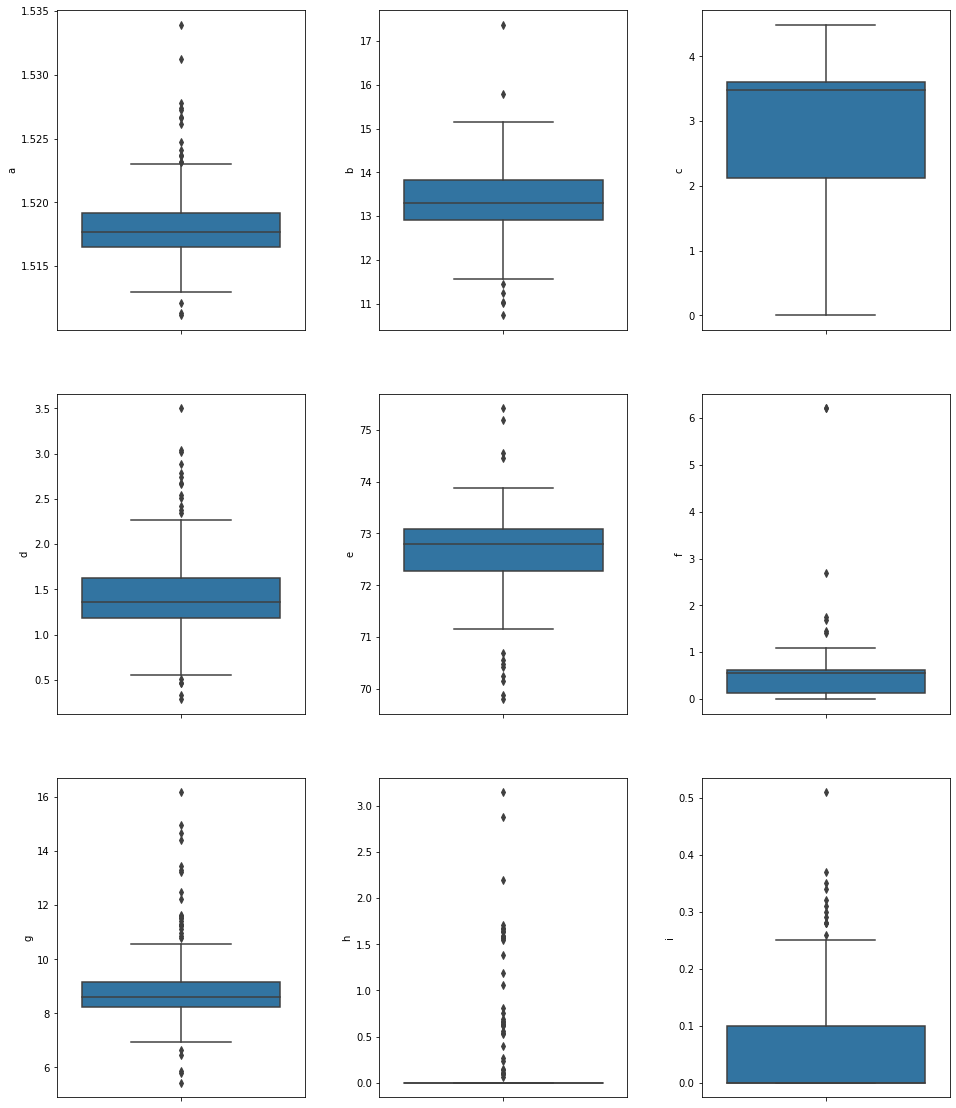

In [10]:
# cols = ['a','b','c','d','e','f','g','h','i']
box_plots(ingredient,ingredient.columns,3,'y',title=None,figsize=(16,20))

Outliers shown in the boxplot above can be treat them accordingly by eliminate them from the dataset using Z score measure. However since the dataset is so small, It has been decided to continue with all the data.

# ANOVA Testing

### Null hypothesis (H0) = There is no significant difference among the average consumptions of additives in formulations
### Alternative hypothesis (H1) = There are significant diffrence among the average consumptions of at least two of the additives.

In [11]:
#Reshape the dataset to prepare it for Analysis of variance or ANOVA
df = pd.melt(ingredient,value_vars=ingredient.columns,var_name='additives')
df.head()

,additives,value
0,a,1.51735
1,a,1.53125
2,a,1.52300
3,a,1.51768
4,a,1.51813


In [12]:
#Check if all the additives are having same number of rows
df['additives'].value_counts().sort_index()

a    214
b    214
c    214
d    214
e    214
f    214
g    214
h    214
i    214
Name: additives, dtype: int64

In [13]:
mod = ols('value~additives',data=df).fit()
aov = sm.stats.anova_lm(mod,type=2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
additives,8.0,943261.084445,117907.635556,168331.968858,0.0
Residual,1917.0,1342.757047,0.700447,NaN,NaN


### Interpretation: The P-value obtained from ANOVA analysis is significant (P<0.05),  Therefore, we conclude that there are significant differences among additives.

From ANOVA analysis, we know that additives differences are statistically significant, but ANOVA does not tell which additives are significantly different from each other. To know the pairs of significant different addtives, we will perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

In [14]:
# load packages
from pingouin import pairwise_tukey
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukey(data=df, dv='value', between='additives')
m_comp

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,a,b,1.518365,13.407850,-11.889485,0.080909,-146.949215,0.001000,-14.181091
1,a,c,1.518365,2.684533,-1.166167,0.080909,-14.413355,0.001000,-1.390937
2,a,d,1.518365,1.444907,0.073459,0.080909,0.907922,0.900000,0.087618
3,a,e,1.518365,72.650935,-71.132569,0.080909,-879.169716,0.001000,-84.842822
4,a,f,1.518365,0.497056,1.021309,0.080909,12.622969,0.001000,1.218159
5,a,g,1.518365,8.956963,-7.438597,0.080909,-91.938046,0.001000,-8.872329
6,a,h,1.518365,0.175047,1.343319,0.080909,16.602874,0.001000,1.602233
7,a,i,1.518365,0.057009,1.461356,0.080909,18.061769,0.001000,1.743021
8,b,c,13.407850,2.684533,10.723318,0.080909,132.535860,0.001000,12.790154
9,b,d,13.407850,1.444907,11.962944,0.080909,147.857137,0.001000,14.268709


Above results from Tukey HSD suggests that except a-d,f-h,h-i, all other pairwise comparisons for addtives rejects null hypothesis (P-tukey<0.05) and indicates statistical significant differences.

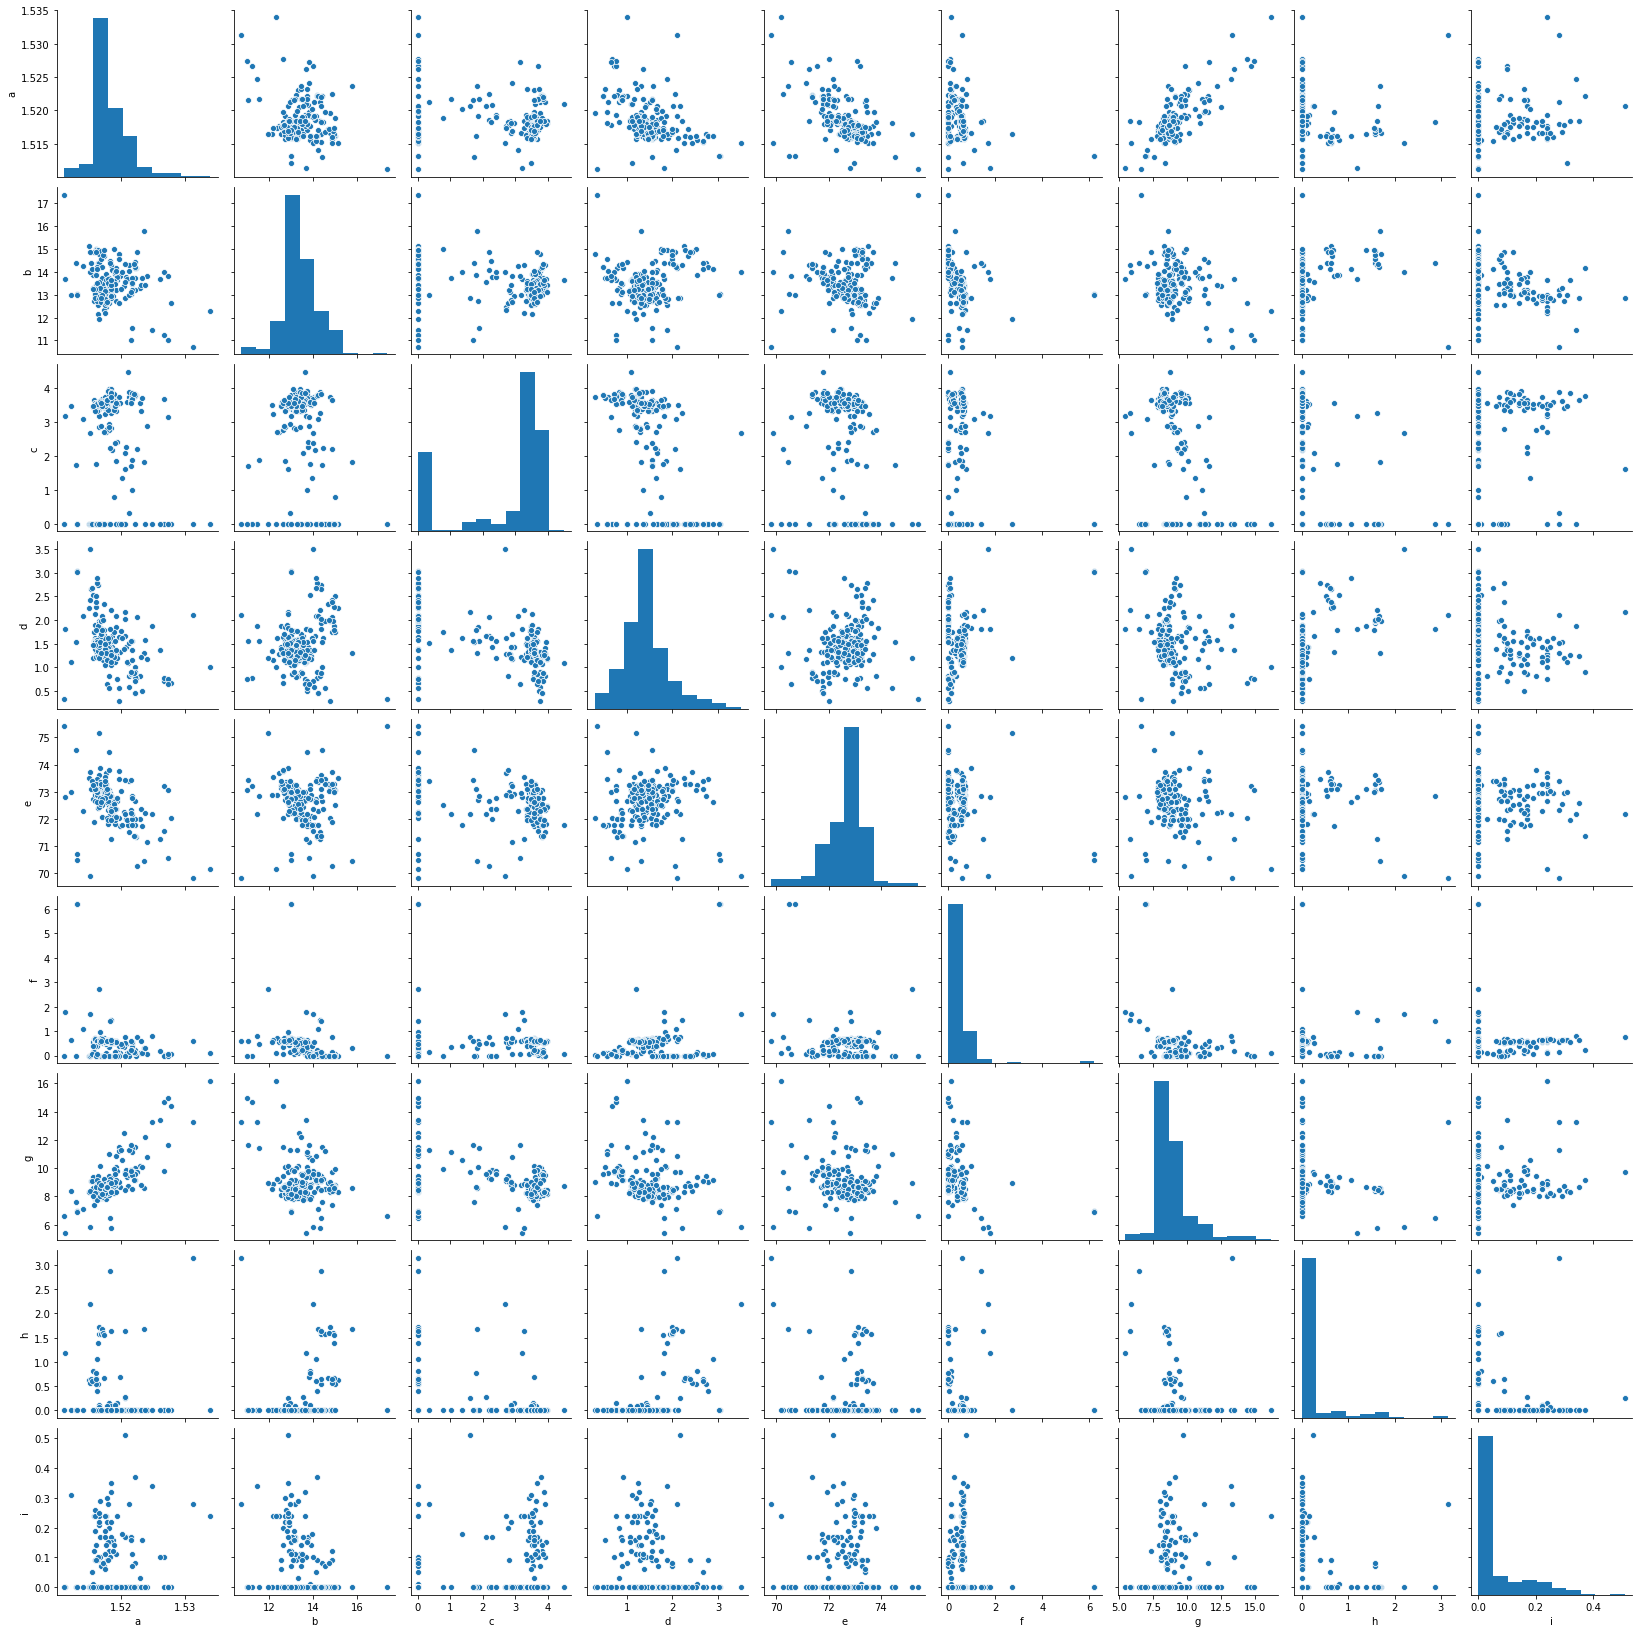

In [15]:
sns.pairplot(ingredient)

The pairplot above shows some correlations among the addtives. For example we can see a-g have positive relations. This also has been varified in the heatmap above.

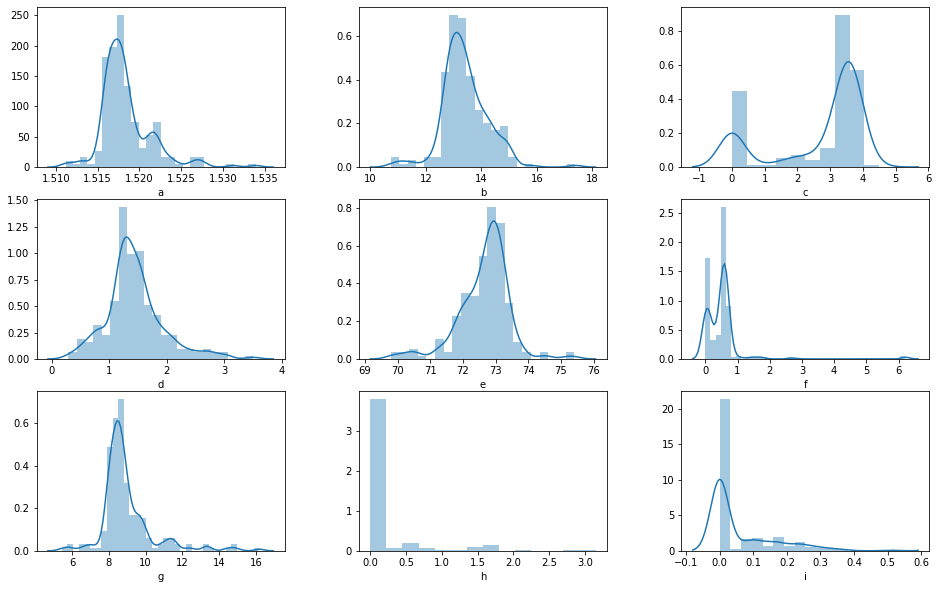

In [16]:
# cols = ['a','b','c','d','e','f','g','h','i']
dis_plot(ingredient,ingredient.columns,3)

From the figure above it can determine that additives "f", "h" and "i" has lower consumptions than others while "a","b","d","e","g" have normal distributions and consumptions. In addtion we can see that "c" has diffrent distribusions and two peaks. This could be because not all the formula uses "c" or some formula uses c more than others.

In [17]:
#Transform features by scaling each feature to a given range
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(ingredient)
Tingredient = mms.transform(ingredient)

In [18]:
#Find Optimal K 
from sklearn.cluster import KMeans
squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Tingredient)
    squared_distances.append(km.inertia_)

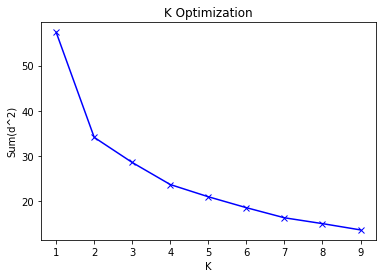

In [19]:
#Visualize optimom number of clusters
plt.plot(K, squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum(d^2)')
plt.title('K Optimization')
plt.show()

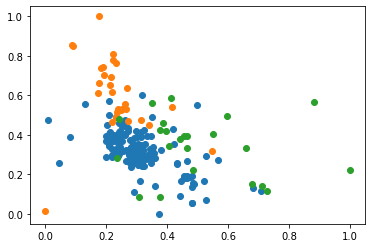

In [20]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot

model = MiniBatchKMeans(n_clusters=3)
# fit the model
model.fit(Tingredient)
# assign a cluster to each example
yhat = model.predict(Tingredient)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(Tingredient[row_ix, 0], Tingredient[row_ix,3])
# show the plot
pyplot.show()

In [21]:
ingredient2 = ingredient.copy()

Since it is a multi-dimentional problem, in the 2-D graph above there are lots of points in the same vacinity allocated to different clusters.

In [22]:
ingredient2['cluster'] = yhat
ingredient2

,a,b,c,d,e,f,g,h,i,cluster
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,0
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,0
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,0
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,0


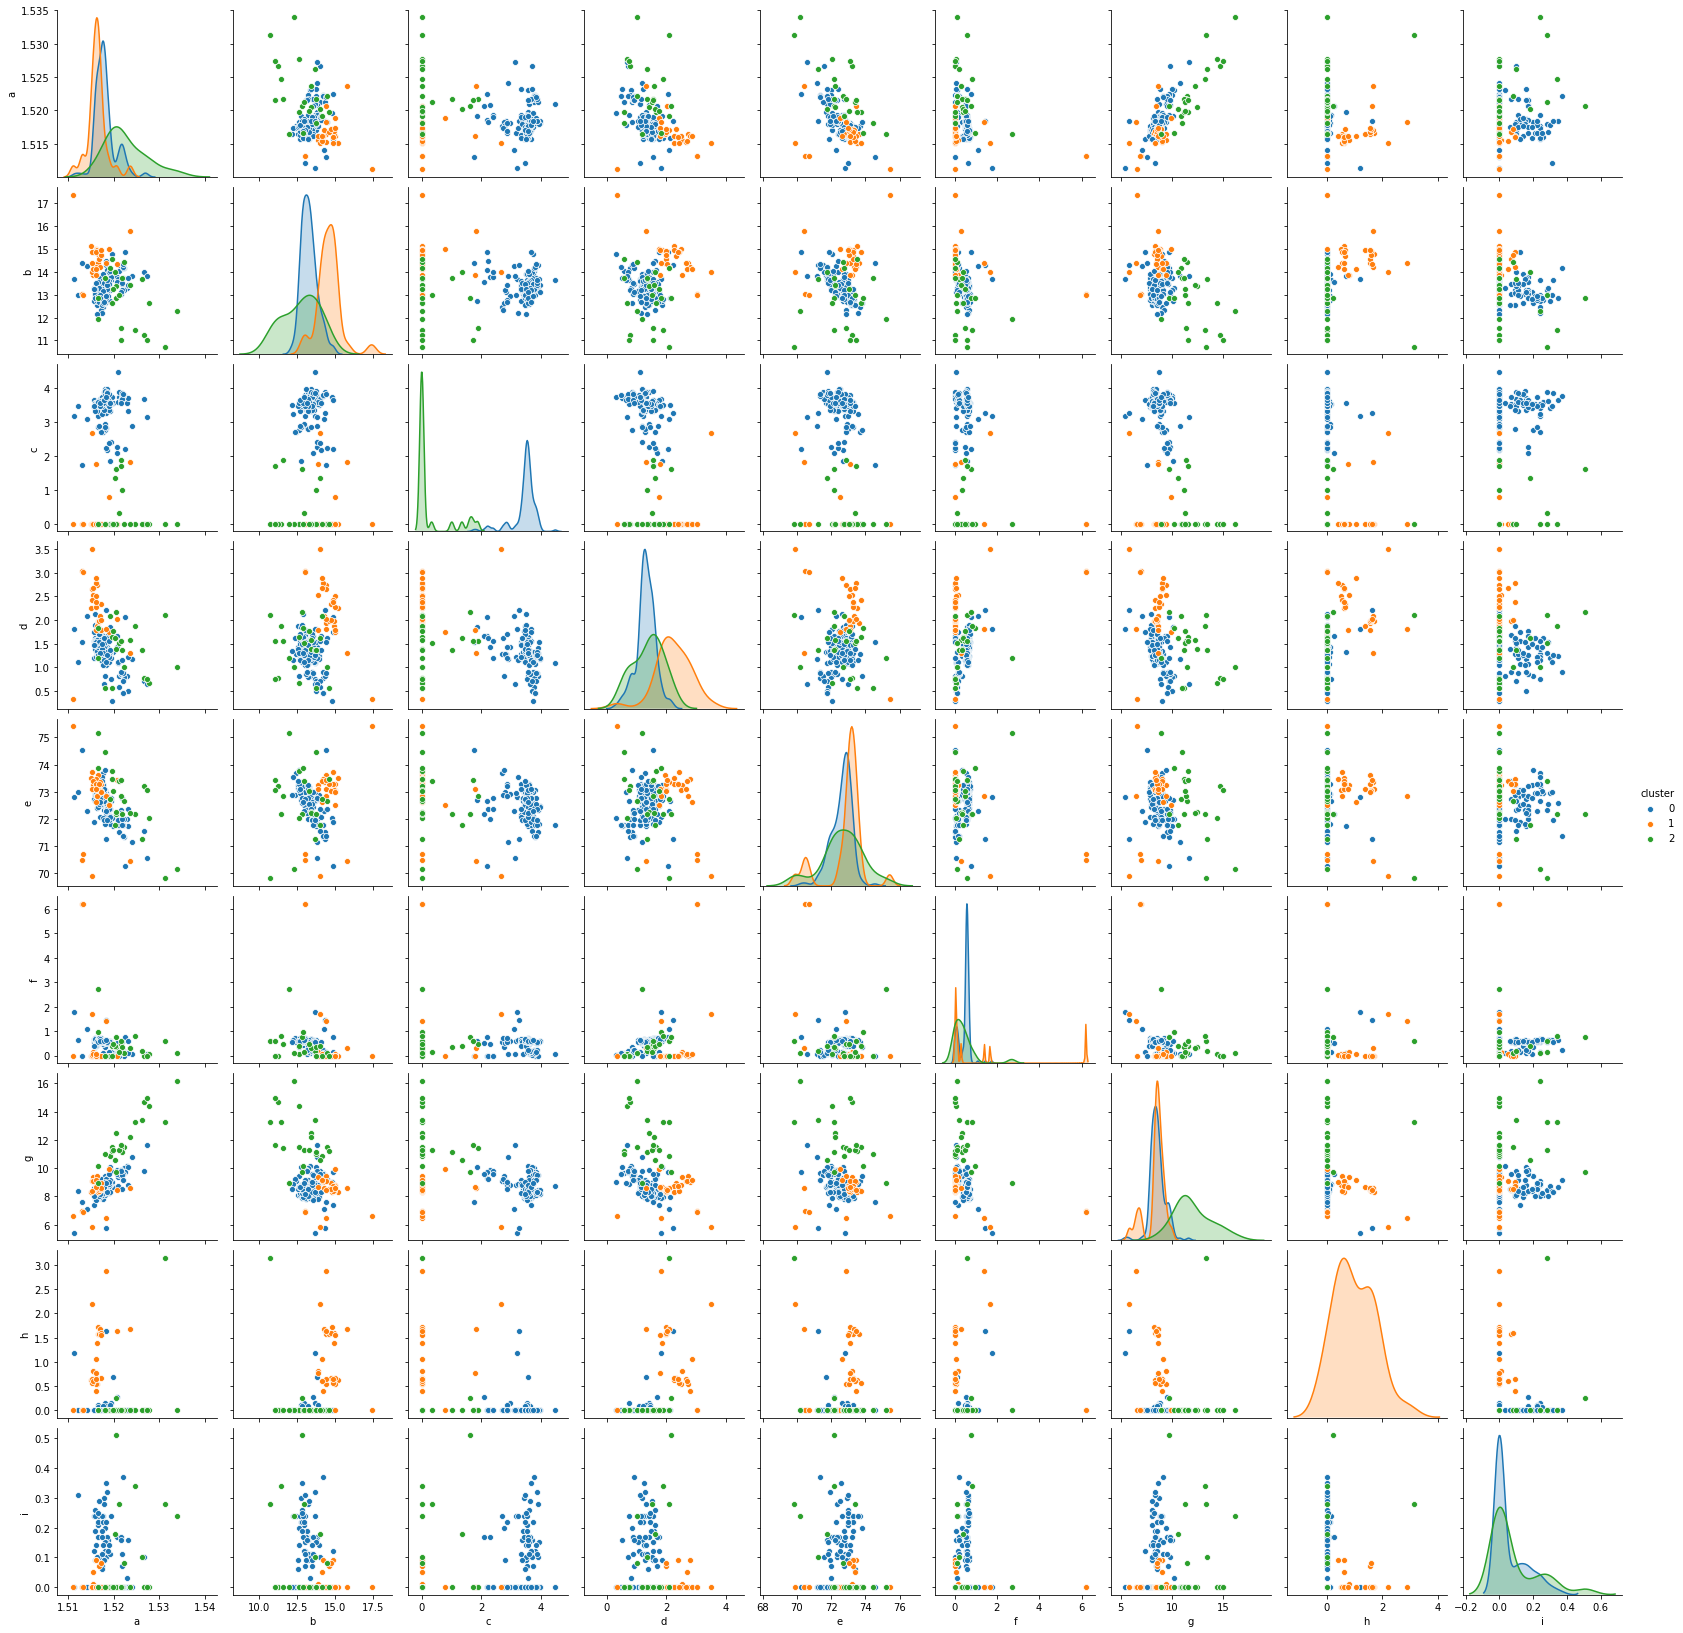

In [23]:
sns.pairplot(ingredient2,hue='cluster')

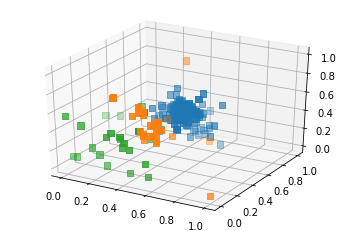

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, cluster in enumerate(clusters):
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    
    x = np.array(Tingredient[row_ix,1])
    y = np.array(Tingredient[row_ix,2])
    z = np.array(Tingredient[row_ix,3])
    # create scatter of these samples
    ax.scatter(x,y,z, marker="s", s=40)
# show the plot
pyplot.show()

The 3-D Graph above shows the three clusters 